In [9]:
"""Pakete für die Analyse"""
#Packages to work with out Data
import pandas as pd
import folium as fm
import geopandas as gpd
import numpy as np

#utilities
import os

#Package for examples(faster plottime, and offline)
import matplotlib.pyplot as plt

# Package to locate
from geopy import Nominatim

# Package for the Final_Version (just Python)
# import datafunctions as dfunc

In [10]:
"""Functions get_Data_X"""

def check_file(file_name):
    #checks if a file is there and if the file is empty
    return os.path.exists(file_name) and os.stat(file_name).st_size != 0



def get_cvd_data(file: str = "Data/data.csv") -> pd.DataFrame:
    #Raw_Data to work with in the Form of (Date,Place)
    decision = check_file(file)
    if decision == False:
        print('I need some Data to work with')
    else:
        D_df = pd.read_csv(filepath_or_buffer=file, sep=';', header=None, names=['Datum','Ort'], dtype={'Datum': str,'plz':str })
        D_df['Datum']= pd.to_datetime(D_df['Datum'],dayfirst=True, format="%d.%m.%Y", errors='coerce') #ignore
        D_df.sort_values('Datum', ignore_index=True)
 
    return D_df



def get_geo_data(file: str = 'Data/plz-gebiete.shp') -> gpd.GeoDataFrame:
    #Geodata to show the shape of the zip-codes
    decision = check_file(file)
    if decision == False:
        file = 'https://www.suche-postleitzahl.org/download_files/public/plz-gebiete.osm.pbf'

    plz_shape_ger = gpd.read_file(file, dtype={'plz': str})
    
    return plz_shape_ger



def get_plz_data (file: str = 'Data/zuordnung_plz_ort_landkreis.csv') -> pd.DataFrame:
    #Data to see zip-code combined to an Area
    decision = check_file(file)
    if decision == False:
        file = 'https://www.suche-postleitzahl.org/download_files/public/zuordnung_plz_ort_landkreis.csv'

    plz_zuordnung = pd.read_csv(file, dtype={'plz': str})
    
    return plz_zuordnung

In [11]:
data_cvd = get_cvd_data()
data_plz = get_plz_data()
data_geo_ger = get_geo_data()

print(f'This is a Sample for our Patient Data \n {data_cvd.sample(5)}\n')
print(f'This is a Sample for the ZIP-Data (all of Germany) \n {data_plz.sample(5)}\n')
print(f'This is a Sample for our Geo-Shape-Data (all of Germany) \n {data_geo_ger.sample(5)}\n')

This is a Sample for our Patient Data 
             Datum    Ort
116558 2021-05-21  64846
127191 2021-06-08  64293
18580  2020-04-29  64853
86012  2021-03-12  64409
21130  2020-05-07  64291

This is a Sample for the ZIP-Data (all of Germany) 
         osm_id      ags       ort    plz                landkreis  \
6580    659752  6438006    Langen  63225      Landkreis Offenbach   
7191    722147  8115029  Magstadt  71106      Landkreis Böblingen   
2880    534476  7143501  Elbingen  56459          Westerwaldkreis   
4932   1108059  7232238  Heisdorf  54614  Eifelkreis Bitburg-Prüm   
12361   173875  5374048     Wiehl  51674     Oberbergischer Kreis   

                bundesland  
6580                Hessen  
7191     Baden-Württemberg  
2880       Rheinland-Pfalz  
4932       Rheinland-Pfalz  
12361  Nordrhein-Westfalen  

This is a Sample for our Geo-Shape-Data (all of Germany) 
         plz                note  \
2442  64653        64653 Lorsch   
557   51143         51143 KÃ¶ln   
34

In [12]:
"""
General Functions to combine and filter the data
A. just the relevant Geodata
"""

def generate_plz_list(Name_1: str, Name_2:str, df: pd.DataFrame, column1: str, column2: str) -> list:
    #search for relevant zip-codes
    
    data_1 = df[(df[column1] == Name_1)]
    data_2 = df[(df[column2] == Name_2)]
    data = data_1.append(data_2)
    
    return list(data['plz'])


def get_plz_from_data(df: pd.DataFrame) -> list:
    #alternativ just get the relevant zip-codes
    return list(df['Ort'].unique().astype(str))
    

def plz_shape_from_list(geodata: gpd.GeoDataFrame, plz_list: list) -> gpd.GeoDataFrame:
    #get the relevant geodata just from the list
    return geodata[geodata['plz'].isin(plz_list)]

In [13]:
Ort = "Darmstadt"
Spalte_1 = 'ort'
Landkreis = "Landkreis Darmstadt-Dieburg"
Spalte_2 = 'landkreis'
plz_list_1 = generate_plz_list(Ort, Landkreis, data_plz, Spalte_1, Spalte_2)
plz_list_2 = get_plz_from_data(data_cvd)

geodata_dadi_1 = plz_shape_from_list(data_geo_ger, plz_list_1)
geodata_dadi_2 = plz_shape_from_list(data_geo_ger, plz_list_2)

print(f'This is a Sample for our Geo-Shape-Data (with a specific Area in Mind) \n {geodata_dadi_1.sample(5)}\n')
print(f'This is a Sample for our Geo-Shape-Data (from a specific dataset) \n {geodata_dadi_2.sample(5)}\n')

This is a Sample for our Geo-Shape-Data (with a specific Area in Mind) 
         plz              note  \
2636  64283   64283 Darmstadt   
2678  64287   64287 Darmstadt   
3127  64850  64850 Schaafheim   
2747  64397    64397 Modautal   
2565  64390   64390 Erzhausen   

                                               geometry  
2636  POLYGON ((8.63962 49.87139, 8.64126 49.87164, ...  
2678  POLYGON ((8.66114 49.86973, 8.66143 49.87052, ...  
3127  POLYGON ((8.95719 49.92172, 8.95889 49.92199, ...  
2747  POLYGON ((8.69961 49.77183, 8.70042 49.77393, ...  
2565  POLYGON ((8.59438 49.95866, 8.59474 49.95975, ...  

This is a Sample for our Geo-Shape-Data (from a specific dataset) 
         plz                 note  \
2832  64859  64859 Eppertshausen   
2788  64409         64409 Messel   
2498  64331    64331 Weiterstadt   
2514  64295      64295 Darmstadt   
2868  64405   64405 Fischbachtal   

                                               geometry  
2832  POLYGON ((8.75637 49.94828, 8.

In [14]:
"""
General Functions to combine and filter the data
B. count and combine the Data
"""

def cases_a_day(data: pd.DataFrame, date: np.datetime64, start: int, stop: int) -> pd.DataFrame:
    #convert to a dataFrame with just the positives cases in the relevant timeframe
    begin = date - np.timedelta64(start, 'D')
    end = date + np.timedelta64(stop, 'D')
    data_for_a_day = data[data['Datum'].between(begin, end, inclusive=True)]
    return data_for_a_day
    

def daycounts_by_place(data: pd.DataFrame, date: np.datetime64, inf_begin: int, inf_end: int) -> pd.DataFrame:
    # pos cases of a day counted by plz
    day_data = cases_a_day(data, date, inf_begin, inf_end)
    heatmap_day = pd.DataFrame(day_data['Ort'].value_counts())
    heatmap_day.reset_index(inplace=True)
    heatmap_day.columns = ['plz','Faelle']
    
    return heatmap_day


def merge_data(df, data, date: np.datetime64, column: str, with_date: bool):
    #combine Data over a specifiv column, and give it a new Date column (if True)
    df_1 = df.copy()
    df_2 = data.copy()
    
    df_1[column] = df_1[column].astype(str)
    df_2[column] = df_2[column].astype(str)
    
    merged_data = pd.merge(
        left=df_1, 
        right=df_2, 
        on=column,
        how='left'
        )
    
    merged_data = merged_data.fillna(0)
    
    if with_date == True:
        Anhang = [date]*len(merged_data[column])
        merged_data.insert(1, 'Datum', Anhang)

    return merged_data

In [15]:
Erster_Tag = np.datetime64('2020-12-02')
Letzter_Tag = np.datetime64('2021-01-01')
inf_Beginn = 5
inf_Ende = 14
merged_column = 'plz'
with_date = True


test_day = daycounts_by_place(data_cvd, Erster_Tag, inf_Beginn, inf_Ende)
test_geo = merge_data(geodata_dadi_1, test_day, Erster_Tag, merged_column, with_date)
print(f'This is a Sample for our Patient Data \n {data_cvd.sample(5)}\n')

This is a Sample for our Patient Data 
             Datum    Ort
69566  2021-02-06  64331
949    2020-01-07  64283
46541  2020-10-07  64404
121013 2021-05-29  64283
29732  2020-06-07  64859



In [16]:
"""
General Functions to combine and filter the data
C. Create datasets for our purposes
"""

def cases_over_a_period(data, frame_df, first_date, last_date, inf_begin: int, inf_end: int, col: str, boolean: bool):
    #create a new Dataset, for our timestamped Maps so cases a day are summerized
    i = first_date
    while i<=last_date:     
        heatdata = daycounts_by_place(data, i, inf_begin, inf_end) 
        relevant = merge_data(frame_df, heatdata, i, col , boolean)
        if i == first_date:
            df = relevant
        else: 
            df = df.append(relevant)   
        i += np.timedelta64(1, 'D')
        
    return pd.DataFrame(df)


def fill_color_and_opacity(df):
    #color and opscity for our stylesheet
    max_c = df['Faelle'].max()
    min_c = df['Faelle'].min()
    
    from branca.colormap import linear
    cmap = linear.PuRd_09.scale(min_c, max_c)
    
    opacity  = df['Faelle'] / max_c
    df.insert(3, 'Opacity', opacity)
    
    df['Faelle'] = df['Faelle'].map(cmap)
    
    return pd.DataFrame(df), cmap
    

def change_time(df):
    #TimeFormat in U10 for Folium
    df['Datum'] = df['Datum'].astype('int') // 10 ** 9
    df['Datum'] = df['Datum'].astype("U10") #.astype('datetime64[s]')
    return df
    

def geojson_create(geodata:gpd.GeoDataFrame):
    #geojson for faster geomodeling and easier use in Folium
    gdf = geodata.drop(columns='note').set_index('plz')    
    return gdf.to_json()


def stylesheet(data):
    #create a stylesheedict for out timedChorodpleth
    styledict = {}
    df_time = change_time(data)
    df, cmap = fill_color_and_opacity(df_time)

    df = df.sort_values(by=['plz','Datum'], ignore_index=True)

    for i, j in df.iterrows():
        if j[0] not in styledict:
            styledict[j[0]]={}
        styledict[j[0]].update({j[1]: { "color" : j[2], "opacity" : j[3] }})
   
    return styledict

In [17]:
# frame = geodata_dadi_2.drop(columns=['geometry','note'])

# test_cases = cases_over_a_period(data_cvd, frame, Erster_Tag, Letzter_Tag, inf_Beginn, inf_Ende, merged_column, with_date)
# test_sheet = stylesheet(test_cases)

# test_df = change_time(test_df)
# gjson_dadi = geojson_create(geodata_dadi_2)

NameError: name 'test_df' is not defined

In [18]:
"""
specific Functions for our Visualisation
A. Testvisualisation (matplotlib)
"""

### Die Gegend anzeigen mit Matplotlib
def plot_map_of_area(geodata: gpd.GeoDataFrame, ):
    
    plt.rcParams['figure.figsize'] = [30, 30]
    fig, ax = plt.subplots()

    map_of_area = geodata.plot(
        ax=ax, 
        column='note',
        alpha=0.5,
        categorical=True,
        edgecolor='black',
        legend=True,
        legend_kwds={'loc': 'upper left', 'ncol': 5 },
        cmap=plt.cm.plasma_r
    )

    ax.set_title('Die Gegend Da-Di', fontdict = {'fontsize': 30})
    ax.set(facecolor='lightblue');
    
    return map_of_area

### Die Gegend anzeigen als Heatmap von einem Tag
def heatmap_of_a_day(geodata: gpd.GeoDataFrame,
                     data: pd.DataFrame,
                     date: np.datetime64,
                     inf_beg: int,
                     inf_end: int):
    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = [30, 30]
    
    heatdata = daycounts_by_place(data, date, inf_beg, inf_end)
    geodata_heatmap = merge_data(geodata, heatdata, date, "plz", False)
    
    heatmap_day = geodata_heatmap.plot(
        ax=ax, 
        column='Faelle', 
        categorical=False, 
        legend=True, 
        cmap=plt.cm.plasma_r
    )
    
    ax.set_title(f'DaDi: Fälle am Tag {date}', fontdict = {'fontsize': 30})
    ax.set(facecolor='lightblue');
    
    return heatmap_day


/Users/m/opt/anaconda3/envs/ox/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/m/opt/anaconda3/envs/ox/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:title={'center':'Die Gegend Da-Di'}>

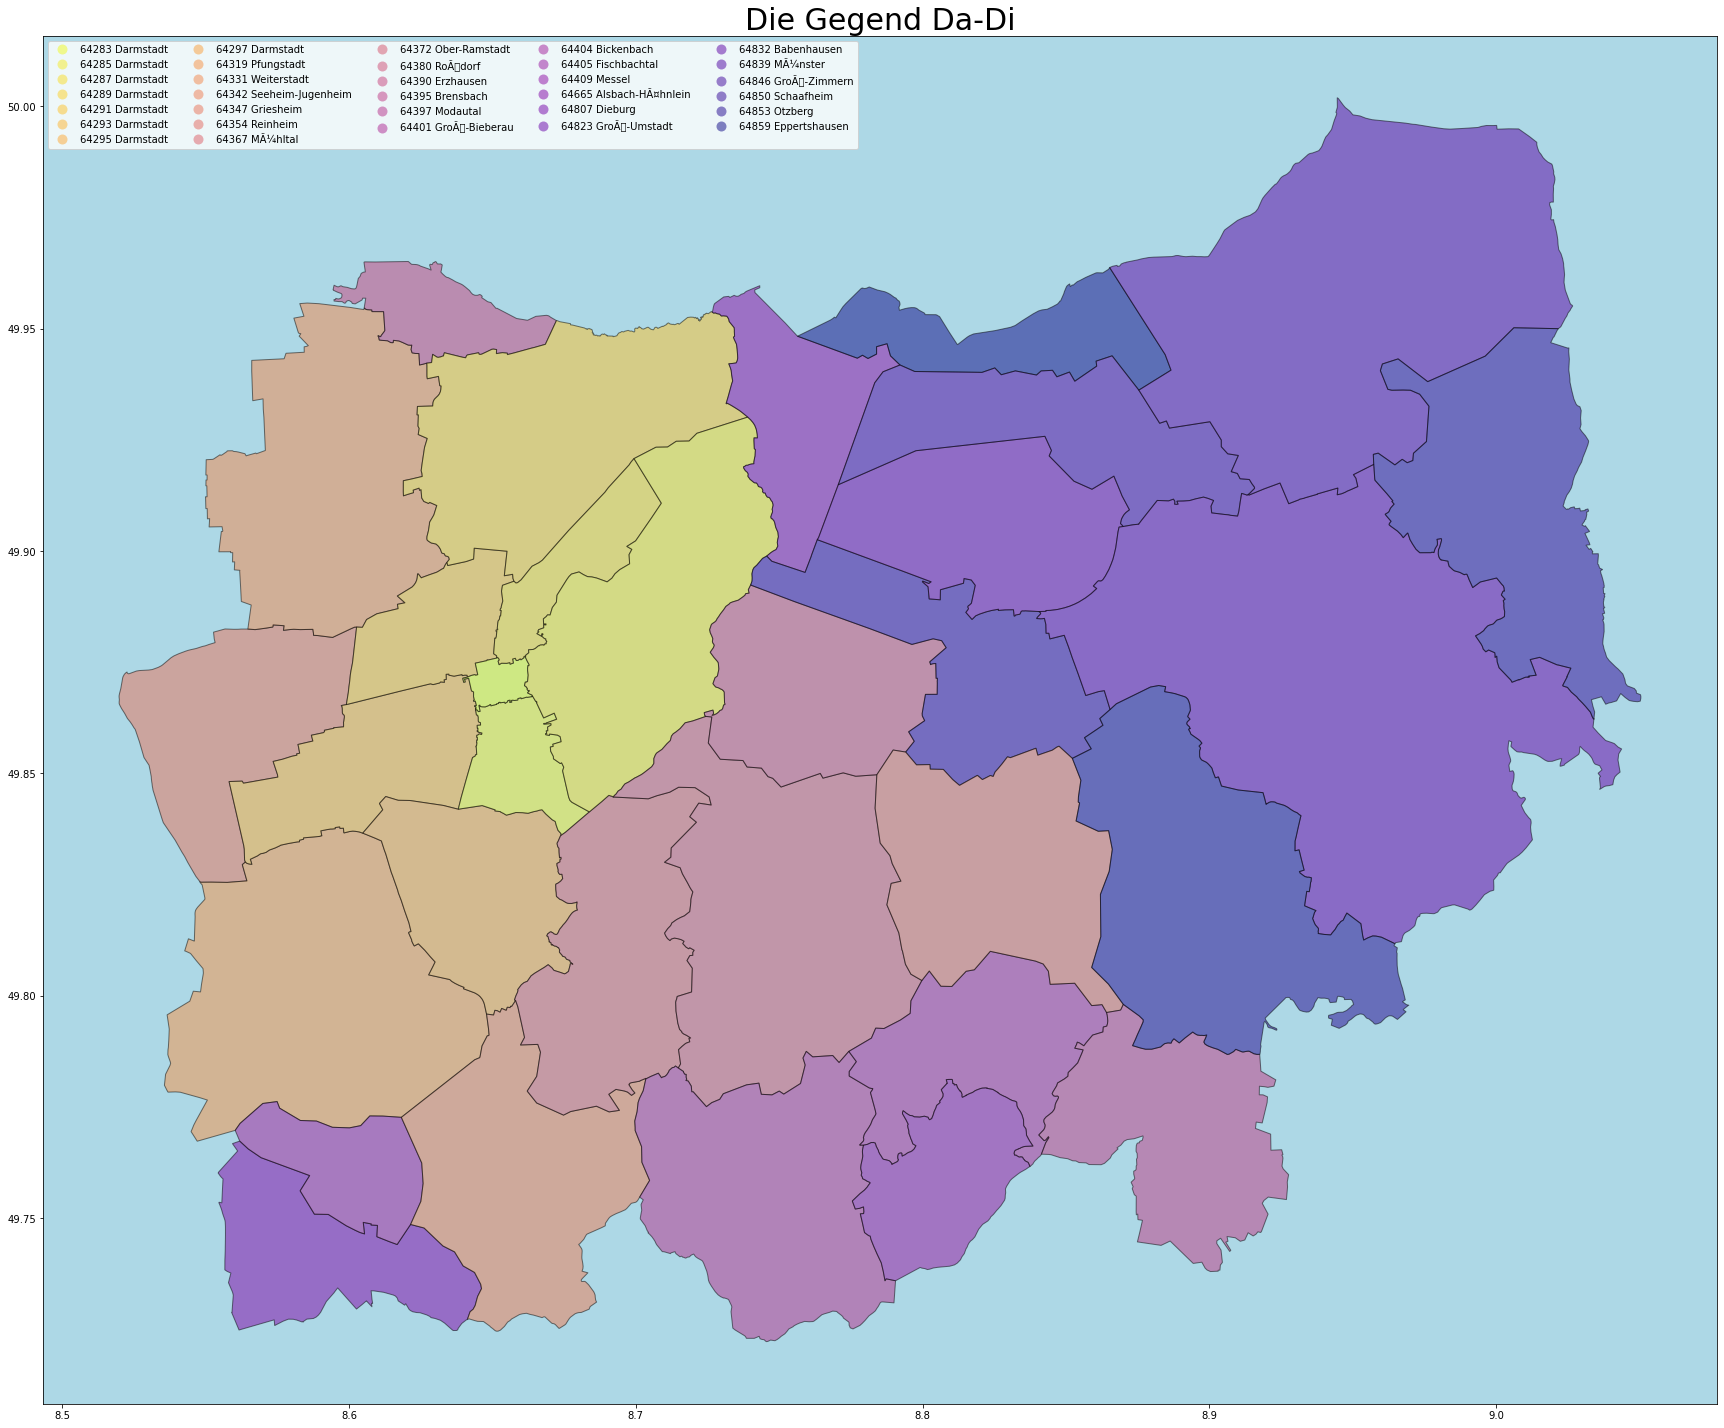

In [19]:
plot_map_of_area(geodata_dadi_1)

<AxesSubplot:title={'center':'DaDi: Fälle am Tag 2020-12-02'}>

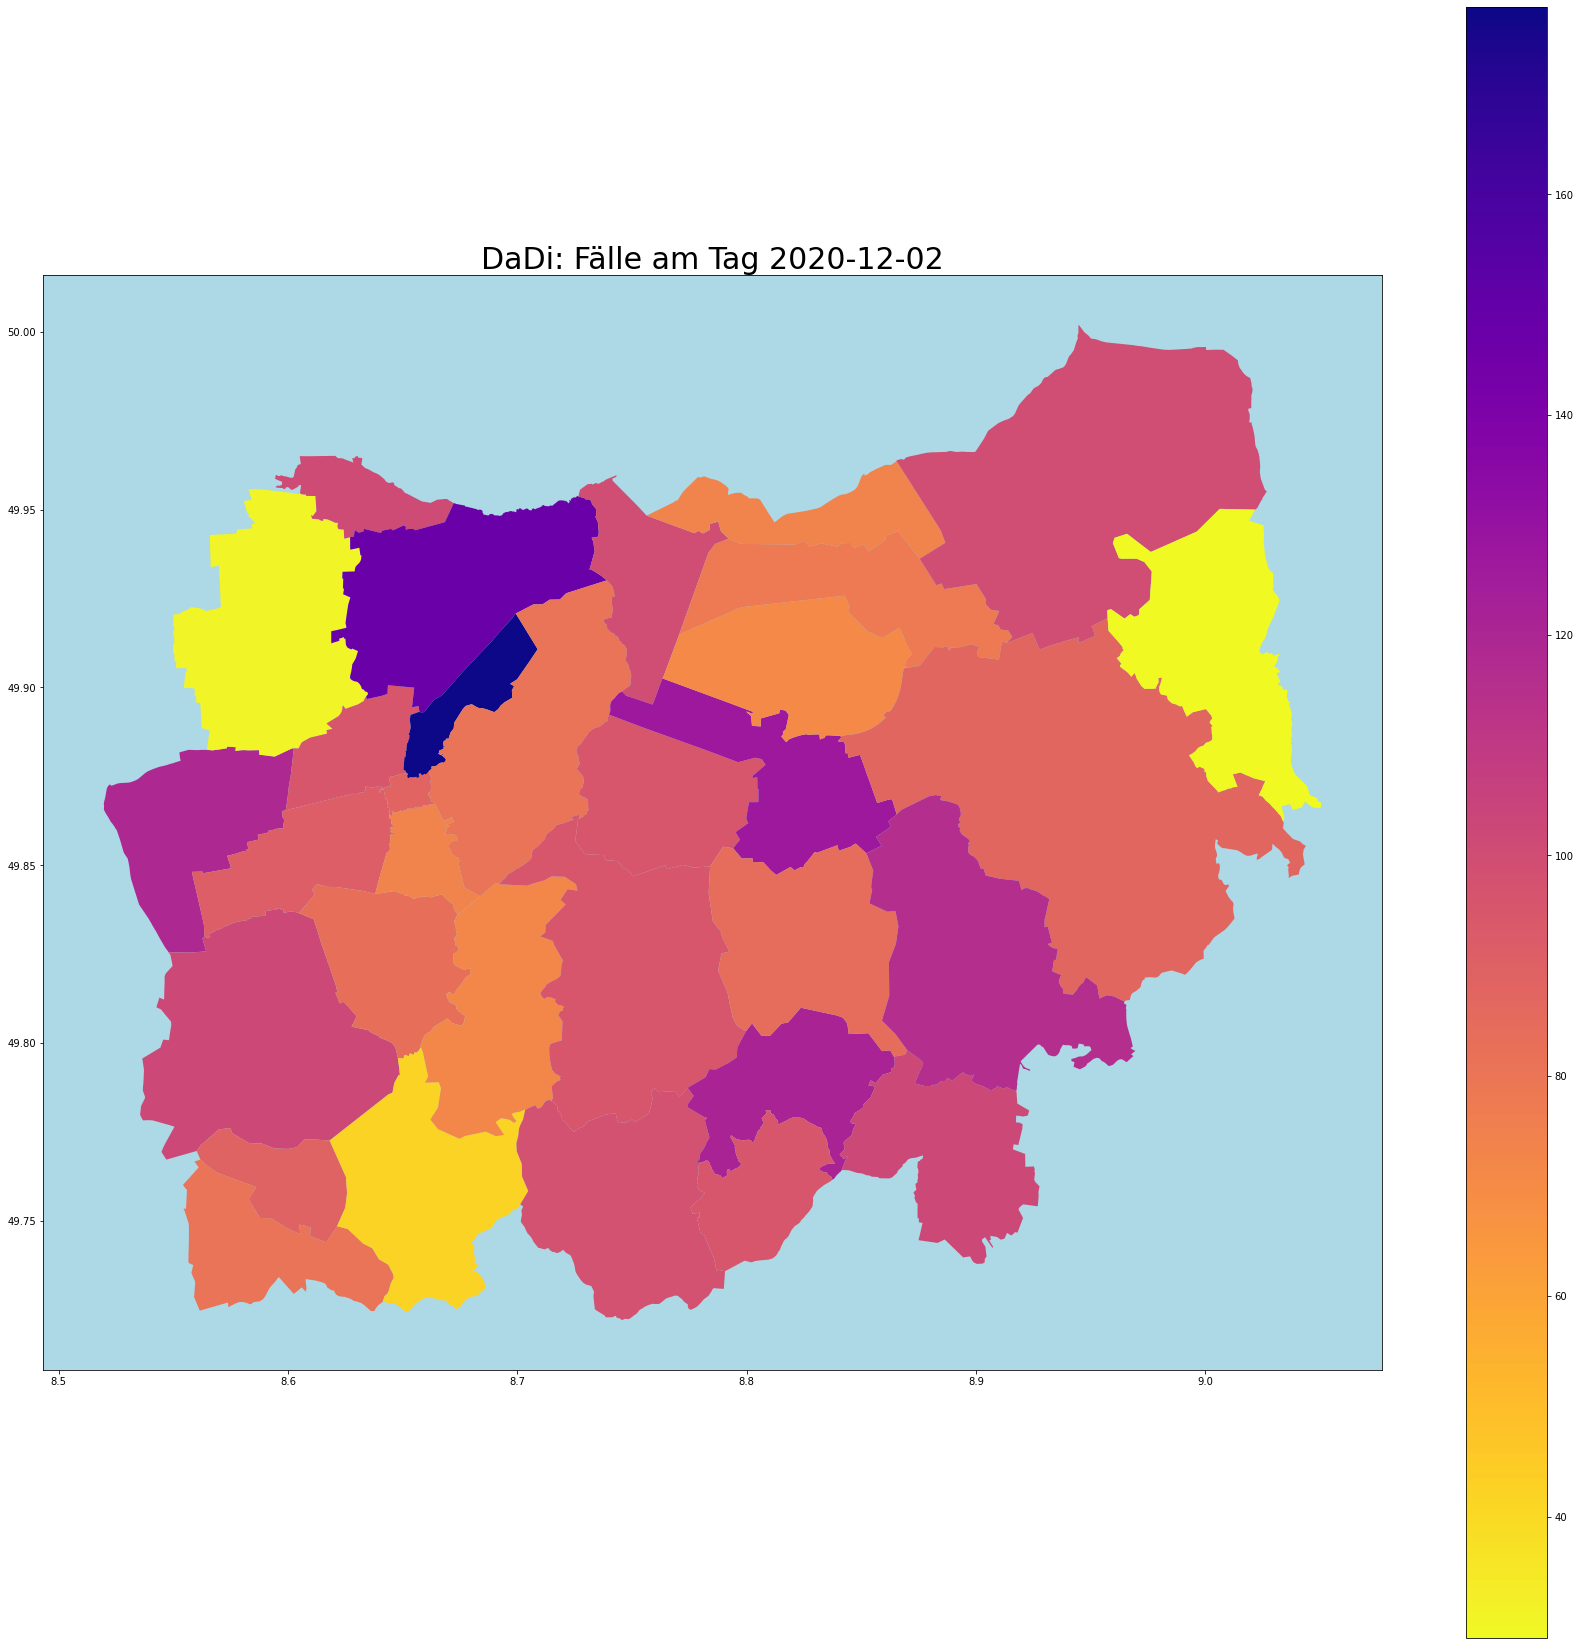

In [20]:
heatmap_of_a_day(geodata_dadi_1, data_cvd, Erster_Tag, inf_Beginn, inf_Ende)

In [21]:
"""
specific Functions for our Visualisation
B. prepare the data for visualisation (Choropleth)
"""

def data_Choropleth(data: pd.DataFrame,
                    geodata: gpd.GeoDataFrame,
                    Begin: np.datetime64,
                    End: np.datetime64,
                    inf_beg: int,
                    inf_end: int):
    
    
    gdf = geodata.drop(columns=['geometry','note'])
    df = cases_over_a_period(data, gdf, Begin, End, inf_beg, inf_end, "plz", True)
    
    return df



### Erzeugt eine zoombare Choropleth Map über Folium
def create_Choropleth(location, geodata, data, day, beg, end):     
    
    Choro_map = fm.Map(location=location, zoom_start=10, control_scale=True)
    
    df = data_Choropleth(data,geodata,day,day,beg,end)
    df_geo = geojson_create(geodata)
    
    fm.Choropleth(geo_data=df_geo,
                     name="Heatmap",
                     data=df,
                     columns=['plz', 'Faelle'],
                     fill_color= 'PuRd', #BuGn OrRd BuPu GnBu PuBu PuBuGn PuRd RdPu YlGn YlGnBu YlOrBr YlOrRd
                     fill_opacity = 0.3,
                     line_capacity=.1,
                     legend_name= 'Faelle',
                     show_legend= True,
                     key_on="feature.id",
                     nan_fill_color='white'
                     ).add_to(Choro_map)
    
    return Choro_map 



### Mit Zeitverlauf
def Time_Slider_Choropleth(location,
                         data: pd.DataFrame,
                         geodata: gpd.GeoDataFrame,
                         first_day: np.datetime64,
                         last_day: np.datetime64,
                         inf_beg: int,
                         inf_end: int):
    
    from folium.plugins import TimeSliderChoropleth
    
    df_chrono = data_Choropleth(data,geodata,first_day,last_day,inf_beg,inf_end)
    
    geojson = geojson_create(geodata)
    
    style = stylesheet(df_chrono)
    
    final_map = fm.Map(location=location, zoom_start=10, control_scale=True)    
    
    TimeSliderChoropleth(data=geojson,
                         styledict=style,
                         name="Heatmap_time",
                         overlay=True,
                         control = True,
                         show = True).add_to(final_map)
    
    final_map.add_child(fm.LayerControl())
    final_map.save("ChoroplethTime.html")
    
    return final_map

In [22]:
data_cvd = get_cvd_data()
data_plz = get_plz_data()
data_geo_ger = get_geo_data()

Darmstadt=[49.877, 8.651]
plz_list = get_plz_from_data(data_cvd)
geodata_dadi = plz_shape_from_list(data_geo_ger, plz_list)

Erster_Tag = np.datetime64("2020-01-01")
Letzter_Tag = np.datetime64("2021-06-07")
inf_Beginn = 2
inf_Ende = 14

create_Choropleth(location=Darmstadt, 
                  geodata=geodata_dadi, data=data_cvd, 
                  day=Letzter_Tag, beg=inf_Beginn, end=inf_Ende)

In [23]:
Time_Slider_Choropleth(location = Darmstadt,
                         data = data_cvd, geodata = geodata_dadi,
                         first_day = Erster_Tag, last_day = Letzter_Tag,
                         inf_beg = inf_Beginn, inf_end = inf_Ende)

In [24]:
"""
specific functions for our Visualisation
C. prepare the data for visualisation (Heatmap)
"""

#unfinished

def data_HeatmapTime(data: pd.DataFrame,
                    geodata: gpd.GeoDataFrame,
                    Begin: np.datetime64,
                    End: np.datetime64,
                    inf_beg: int,
                    inf_end: int):
    

    
    gdf = geodata.copy()
    gdf['geometry'] = gdf['geometry'].centroid
    gdf = gdf.drop(columns=['note'])
    
    beg = Begin - dt.timedelta(days=inf_end)
    end = End + dt.timedelta(days=inf_beg)
    relevant = data[data['Datum'].between(beg, end, inclusive=True)]
    
    while i<=End:
        
        heatdata = daycounts_by_place(relevant, i, inf_beg, inf_end) 
        geodata_heatmap = merge_data(gdf, heatdata, i)
        if i == Begin:
            df = geodata_heatmap
        else: 
            df = df.append(geodata_heatmap)   
        i+=td
        
        
    df = pd.DataFrame(df)
    df['Faelle']=df['Faelle'].div(df['Faelle'].max())
    index = list(df['Datum'])
    
    heat_data=[]
    for i, j in df.iterrows():
        heat_data.append((j[2],j[3]))
       
    return heat_data, index


def Time_Slider_Heatmap(location,
                         data: pd.DataFrame,
                         geodata: gpd.GeoDataFrame,
                         first_day: np.datetime64,
                         last_day: np.datetime64,
                         inf_beg: int,
                         inf_end: int):
    
    from folium.plugins import HeatMapWithTime
    
    heat_data, index = data_HeatmapTime(data,geodata,first_day,last_day,inf_beg,inf_end)
        
    final_map = fm.Map(location=location, zoom_start=10, control_scale=True)    
    
    HeatMapWithTime(data=heat_data,
                         
                         name="Heatmap_time",
                         overlay=True,
                         control = True,
                        scale_radius= True,
                    
                         show = True).add_to(final_map)
    
    final_map.add_child(fm.LayerControl())
    final_map.save("HeatmapWithTime.html")
    
    return final_map


In [136]:
"""
Mögliche Erkenntnisse:
- Übertragungen auf andere Infektionskrankheiten:
    - Wo treten Sie häufig auf?
    - Wo lässt sich präventive Arbeit effektiver einsetzen?
    - In welchen Orten/Bereichen lohnt sich ein genauerer Blick?
    - Wo gibt es evtl. Infektionsherde?
    

Mögliche weitere Anwendungen:
- eine Funktion um sich die Veränderung und Bewgung der Infizierten anzuschauen.
- so lässt sich eine Mobilitätskarte erzeugen
- Flüsse (Veränderungen) anzeigen lassen, Annsteckungsketten
- Einrichtung auf der Karte anzeigen lassen, um zu schauen ob es einen Zusammenhang mit lokalen Maxima gibt.
- Über Punkte (Strasse,PLZ), eine genauere Heatmap erzeugen und nachschauen ob es in bestimmten Gebieten
  vermehrt zu Infektionen kommt
- mehrere Lagen mit verschiedenen Informationen lassen sich kombinieren
- andere Daten können genauso gut analysiert werden
"""

'\nMögliche Erkenntnisse:\n- Übertragungen auf andere Infektionskrankheiten:\n    - Wo treten Sie häufig auf?\n    - Wo lässt sich präventive Arbeit effektiver einsetzen?\n    - In welchen Orten/Bereichen lohnt sich ein genauerer Blick?\n    - Wo gibt es evtl. Infektionsherde?\n    \n\nMögliche weitere Anwendungen:\n- eine Funktion um sich die Veränderung und Bewgung der Infizierten anzuschauen.\n- so lässt sich eine Mobilitätskarte erzeugen\n- Flüsse (Veränderungen) anzeigen lassen, Annsteckungsketten\n- Einrichtung auf der Karte anzeigen lassen, um zu schauen ob es einen Zusammenhang mit lokalen Maxima gibt.\n- Über Punkte (Strasse,PLZ), eine genauere Heatmap erzeugen und nachschauen ob es in bestimmten Gebieten\n  vermehrt zu Infektionen kommt\n- mehrere Lagen mit verschiedenen Informationen lassen sich kombinieren\n- andere Daten können genauso gut analysiert werden\n'